In [26]:
import cv2
import matplotlib.pyplot as plt

In [27]:
orgImg = cv2.imread('Lena.png')

In [28]:
print(orgImg.shape)

(512, 512, 3)


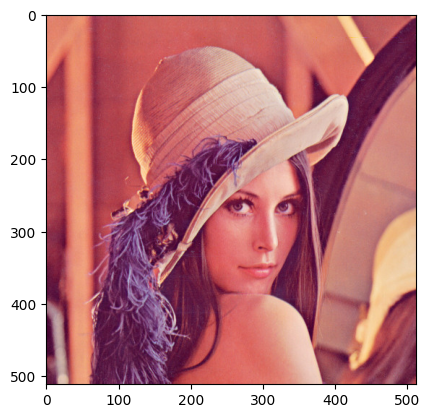

In [29]:
plt.imshow(cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
def imgShow2(img1, img1Title, img1Color, img2, img2Title, img2Color):
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(1, 2, 1)

    if (img1Color == 1):
        imgPlot = plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    else:
        imgPlot = plt.imshow(img1, cmap="gray")
    
    ax.set_title(img1Title)


    ax = fig.add_subplot(1, 2, 2)

    if (img2Color == 1):
        imgPlot = plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    else:
        imgPlot = plt.imshow(img2, cmap="gray")
    
    ax.set_title(img2Title)

(512, 512)


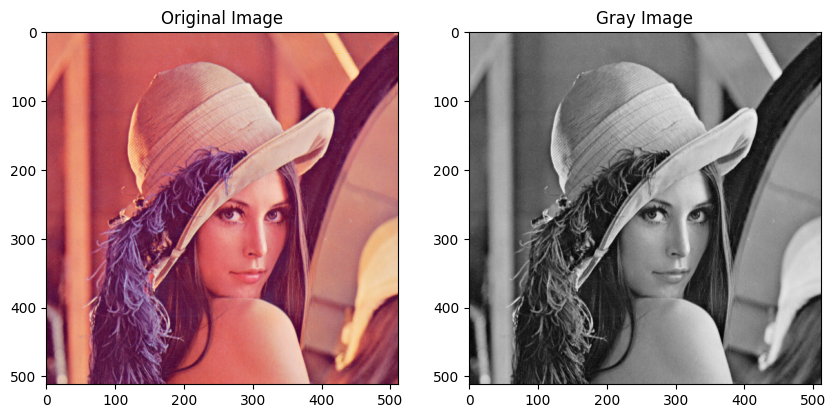

In [31]:
# Convert to gray scale
grayImg = cv2.cvtColor(orgImg, cv2.COLOR_BGR2GRAY)
print(grayImg.shape)
imgShow2(orgImg, "Original Image", 1, grayImg, "Gray Image", 0)

In [32]:
print(grayImg)

[[161 162 163 ... 169 154 127]
 [162 162 162 ... 171 157 130]
 [162 162 162 ... 169 156 128]
 ...
 [ 44  41  53 ... 102 100 100]
 [ 43  41  57 ... 104 106 106]
 [ 44  42  57 ... 102 108 109]]


In [33]:
import numpy as np
gray32Img = np.float32(grayImg)
print(gray32Img)

[[161. 162. 163. ... 169. 154. 127.]
 [162. 162. 162. ... 171. 157. 130.]
 [162. 162. 162. ... 169. 156. 128.]
 ...
 [ 44.  41.  53. ... 102. 100. 100.]
 [ 43.  41.  57. ... 104. 106. 106.]
 [ 44.  42.  57. ... 102. 108. 109.]]


In [34]:
blocksize = 2
ksize = 3
k = 0.5
harrisCornerR = cv2.cornerHarris(gray32Img, blocksize, ksize, k)
print(harrisCornerR)

[[-5.07812500e-02 -5.07812500e-02 -1.62597656e-01 ... -5.93697656e+03
  -4.65602656e+05 -3.66494500e+05]
 [-5.07812500e-02 -5.07812500e-02 -1.62597656e-01 ... -5.93697656e+03
  -4.65602656e+05 -3.66494500e+05]
 [-1.07910156e-01 -1.07910156e-01 -2.29980469e-01 ... -5.17720947e+03
  -4.43782062e+05 -3.53247688e+05]
 ...
 [-8.88429688e+02 -8.88429688e+02 -5.90723145e+02 ... -9.25075684e+02
  -1.29907666e+03 -2.41112842e+03]
 [-1.65341406e+03 -1.65341406e+03 -3.23831250e+03 ... -1.47279297e+02
  -3.74861328e+02 -1.87604883e+03]
 [-3.60286328e+03 -3.60286328e+03 -6.44642969e+03 ... -4.96176758e+01
  -1.93042480e+02 -4.19584473e+02]]


In [35]:
print(harrisCornerR.max())

0.0


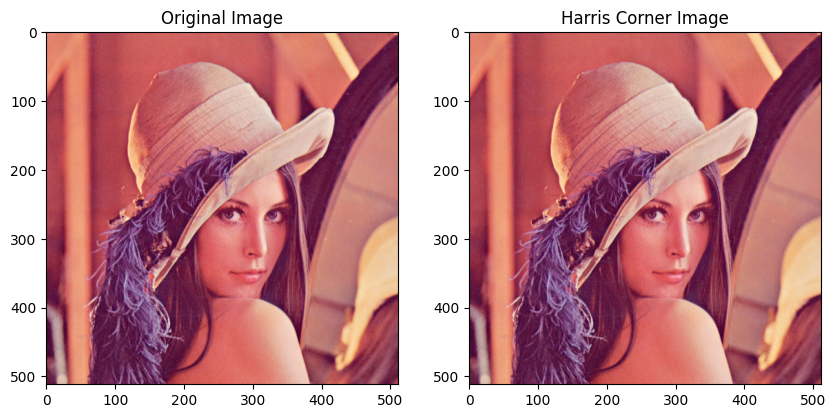

In [36]:
harrisCornerImg = orgImg.copy()
harrisCornerImg[harrisCornerR > harrisCornerR.max() / 100] = [0, 255, 0]
imgShow2(orgImg, "Original Image", 1, harrisCornerImg, "Harris Corner Image", 1)